In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
import seaborn as sns
import scipy.stats as st
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels as statm
from scipy.stats import norm, f
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LogisticRegression
import math
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
def get_cleaned_data():
    data = pd.read_csv('/home/tal/Downloads/athletes.csv')
    data['dob'] = pd.to_datetime(data["dob"], format='%m/%d/%y')
    data['age'] = (pd.to_datetime('now') - data['dob']).astype('<m8[Y]')
    data['age'] = data['age'].astype(float)
    data["total"] = data[['gold', 'silver', 'bronze']].agg(sum, axis=1)
    data['gender']=data['sex'].copy()
    data['gender']= data['gender'].apply(lambda x: 1 if x=='Female' else 2)
    data['won'] = data['total'].apply(lambda x: x if x>0 else x+0.1)#1 if x == 0 else x)
    no_missing_values_data = data.dropna()
    no_missing_values_data = no_missing_values_data.loc[data['age'] > 0, :]
    return data,no_missing_values_data

In [3]:
def get_sample(data,sample_size):
    winners = data.loc[data['won']>0.5, :]
    sample = data.sample(n=sample_size, random_state=1)
    return sample

In [4]:
np.random.seed(42)

## **Question 1**

In [5]:
raw_df, clean_df = get_cleaned_data()
clean_df_sample = get_sample(clean_df,sample_size = 1000)
df_sample = get_sample(clean_df,sample_size = 1000)
#clean_data_sample = clean_df_sample[['weight', 'gender', 'won','age']].to_numpy()
#clean_data_sample = np.concatenate([np.ones((clean_data_sample.shape[0],1),dtype=clean_data_sample.dtype), clean_data_sample], axis=1)
ones = np.ones((df_sample.shape[0],1))
df_sample.insert(0,'bias',ones)
df_sample = df_sample.sort_values(by='age')
clean_X_sample = df_sample[['bias','weight', 'gender', 'won']]
clean_y_sample = df_sample[['age']] 
#clean_regressor_sample = LinearRegression().fit(clean_X_sample,clean_y_sample)
#clean_beta_sample = clean_regressor_sample.coef_

#raw_data_sample = raw_df_sample[['weight', 'gender', 'won','age']].to_numpy()
#raw_data_sample = np.concatenate([np.ones((raw_data_sample.shape[0],1),dtype=raw_data_sample.dtype), raw_data_sample], axis=1)
#raw_X_sample = raw_data_sample[:,:4]
#raw_y_sample = raw_data_sample[:,4] 

In [6]:
def SE_NormalCov(X,beta):
    X_array = X.to_numpy() 
    l = beta - 1.96 * np.sqrt(np.diag(np.linalg.pinv(X_array.T @ X_array)))
    u = beta + 1.96 * np.sqrt(np.diag(np.linalg.pinv(X_array.T @ X_array)))
    indices = list(range(3))
    l,u,beta = l.flatten().tolist(),u.flatten().tolist(),beta.flatten().tolist()
    for i in indices:
        print(f'\nBeta - {i}')
        print(f"CI Normal Aproximation by Covariance Matrix = [ {l[i]}, {u[i]}]")
        print(f'CI Length: {u[i] - l[i]}')
        print(f"CI contains the value of regression coeffision : {l[i] <= beta[i] <= u[i]}")

## **Question 2**


In [7]:
#clean_regressor_sample = LinearRegression().fit(clean_X_sample,clean_y_sample)
#clean_beta_sample = clean_regressor_sample.coef_
#SE_NormalCov(clean_X_sample,clean_beta_sample)
X_clean = clean_X_sample.copy()
y_clean = clean_y_sample.copy()
clean_beta_sample = np.linalg.pinv(X_clean.T.dot(X_clean)).dot(X_clean.T).dot(y_clean)
#drop_beta = cleaned_chopped_regressor.coef_
clean_Cov = np.linalg.pinv(X_clean.T.dot(X_clean))
clean_CI = np.zeros((4,2))
print(f'Clean Beta - \n{clean_beta_sample.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(clean_Cov[i,i])
    clean_CI[i,0] = clean_beta_sample[i] - 1.96 * se
    clean_CI[i,1] = clean_beta_sample[i] + 1.96 * se
    print(f'\nClean Beta - {i} = {clean_beta_sample[i]}')
    print(f"Clean CI by Covariance Matrix = [{clean_CI[i,0]}, {clean_CI[i,1]}]")
    print(f'Clean CI Length: {clean_CI[i,1] - clean_CI[i,0]}')
    print(f"Clean CI contains the value of regression coeffision : {clean_CI[i,0] <= clean_beta_sample[i] <= clean_CI[i,1]} ")
#SE_NormalCov(df_drop,drop_beta)

Clean Beta - 
[6.125248862721249, 0.030506282990721324, 12.250497725440395, -0.01669168010737332]

Clean Beta - 0 = [6.12524886]
Clean CI by Covariance Matrix = [6.068307265736433, 6.1821904597060655]
Clean CI Length: 0.11388319396963276
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 1 = [0.03050628]
Clean CI by Covariance Matrix = [0.026677541596194548, 0.0343350243852481]
Clean CI Length: 0.007657482789053555
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 2 = [12.25049773]
Clean CI by Covariance Matrix = [12.136614531470757, 12.364380919410033]
Clean CI Length: 0.22776638793927617
Clean CI contains the value of regression coeffision : [ True] 

Clean Beta - 3 = [-0.01669168]
Clean CI by Covariance Matrix = [-0.18097959855297885, 0.1475962383382322]
Clean CI Length: 0.32857583689121106
Clean CI contains the value of regression coeffision : [ True] 


In [8]:
# raw_regressor_sample = LinearRegression().fit(raw_X_sample,raw_y_sample)
# raw_beta_sample = raw_regressor_sample.coef_
# SE_NormalCov(clean_X_sample,raw_beta_sample)

## **Question 3**

In [74]:
def removeValues(sample,raw_data_sample, n):
    #display(raw_data_sample)
    #display(raw_data_sample)
    probability = raw_data_sample[:,4] / raw_data_sample[:,4].sum()
    cumulative_prob = probability.cumsum()
    mask = np.random.rand(len(raw_data_sample[:,4])) < cumulative_prob
    #missing_values_df = sample.mask(mask,np.nan)
    #display(mask)
    sample['missing_age'] = sample['age'].where(~mask,pd.NaT)
    #display(cumulative_prob)
    #np.random.choice(x, n_samples, p=x)
    #new_raw_data_sample = new_raw_data_sample[:n]
    #display(new_raw_data_sample)
    return sample

#### **Function is calculated by taking the cumulative sum of the probability of each element, and then using this as the threshold to decide which elements will be removed by using a random number generator. This will give higher values in the array a higher probability of being removed.**

# **Question 4**

## **4.A**

In [75]:
df_sample = df_sample[['bias','weight', 'gender', 'won','age']]
df_sample = df_sample.sort_values(by='age')
raw_data_sample = df_sample.to_numpy()
#raw_data_sample = np.concatenate([np.ones((df,raw_data_sample.shape[0],1),dtype=raw_data_sample.dtype), raw_data_sample], axis=1)
missing_df = removeValues(df_sample,raw_data_sample, n = 500).reset_index(drop=True)
#cleaned_chopped_data_sample = chopped_raw_data_sample[~np.isnan(chopped_raw_data_sample).any(axis=1)]
missing_values_indices = np.argwhere(missing_df['missing_age'].isna().to_numpy()).flatten()#.tolist()
df_drop = missing_df.dropna()
df_drop = df_drop.reset_index(drop=True)
X_drop = df_drop[['bias','weight', 'gender', 'won']].astype('float64')
y_drop = df_drop[['age']].astype('float64')
#raw_chopped_X = raw_chopped_data_sample[:,:4]
#raw_chopped_y = raw_chopped_data_sample[:,4]


In [76]:
#drop_regressor = LinearRegression().fit(X_drop.to_numpy(),y_drop.to_numpy())
drop_beta = np.linalg.pinv(X_drop.T.dot(X_drop)).dot(X_drop.T).dot(y_drop)
#drop_beta = cleaned_chopped_regressor.coef_
drop_Cov = np.linalg.pinv(X_drop.T.dot(X_drop))
drop_CI = np.zeros((4,2))
print(f'Drop Beta - \n{drop_beta.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(drop_Cov[i,i])
    drop_CI[i,0] = drop_beta[i] - 1.96 * se
    drop_CI[i,1] = drop_beta[i] + 1.96 * se
    print(f'\nDrop Beta - {i} = {drop_beta[i]}')
    print(f"Drop CI by Covariance Matrix = [{drop_CI[i,0]}, {drop_CI[i,1]}]")
    print(f'Drop CI Length: {drop_CI[i,1] - drop_CI[i,0]}')
    print(f"Drop CI contains the value of regression coeffision : {drop_CI[i,0] <= drop_beta[i] <= drop_CI[i,1]} ")
#SE_NormalCov(df_drop,drop_beta)

Drop Beta - 
[5.580748792830726, 0.03469653965476252, 11.161497585662492, 0.45848640329082846]

Drop Beta - 0 = [5.58074879]
Drop CI by Covariance Matrix = [5.504737056843609, 5.656760528817843]
Drop CI Length: 0.15202347197423371
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 1 = [0.03469654]
Drop CI by Covariance Matrix = [0.02944320133868568, 0.03994987797083936]
Drop CI Length: 0.010506676632153683
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 2 = [11.16149759]
Drop CI by Covariance Matrix = [11.009474113688253, 11.31352105763673]
Drop CI Length: 0.3040469439484781
Drop CI contains the value of regression coeffision : [ True] 

Drop Beta - 3 = [0.4584864]
Drop CI by Covariance Matrix = [0.2439127913624603, 0.6730600152191966]
Drop CI Length: 0.42914722385673626
Drop CI contains the value of regression coeffision : [ True] 


## **4.B**

### **Regression Imputation** <br>
In Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [77]:
missing_df_imp = missing_df.copy()
X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
#for i in range(missing_df_imp.shape[0]):
#X_drop_array[i].dot(drop_beta)
#missing_df_imp['imp_age'] = missing_df_imp['missing_age'].apply(lambda x:X_drop_array[i].dot(drop_beta))
for i in missing_values_indices:    
    #if missing_df_imp.loc[i,'missing_age'] == np.nan:
    missing_df_imp.loc[i,'missing_age'] = X_drop_array[i].dot(drop_beta).item()

X_imp = missing_df_imp[['bias','weight', 'gender', 'won']]
y_imp = missing_df_imp[['missing_age']]
imp_beta = np.linalg.pinv(X_imp.T.dot(X_imp)).dot(X_imp.T).dot(y_imp)
#drop_beta = cleaned_chopped_regressor.coef_
imp_Cov = np.linalg.pinv(X_imp.T.dot(X_imp))
imp_CI = np.zeros((4,2))
print(f'Regression Imputation Beta - {imp_beta.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(imp_Cov[i,i])
    imp_CI[i,0] = imp_beta[i] - 1.96 * se
    imp_CI[i,1] = imp_beta[i] + 1.96 * se
    print(f'\nBeta - {i} = {imp_beta[i]}')
    print(f"CI by Covariance Matrix = [{imp_CI[i,0]}, {imp_CI[i,1]}]")
    print(f'CI Length: {imp_CI[i,1] - imp_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {imp_CI[i,0] <= imp_beta[i] <= imp_CI[i,1]} ")

# SE_NormalCov(df_drop,drop_beta)

Regression Imputation Beta - [5.5807487928320665, 0.03469653965475159, 11.161497585662277, 0.4584864032904534]

Beta - 0 = [5.5807487928320665]
CI by Covariance Matrix = [5.52380719584725, 5.637690389816883]
CI Length: 0.11388319396963276
CI contains the value of regression coeffision : [ True] 

Beta - 1 = [0.03469653965475159]
CI by Covariance Matrix = [0.030867798260224816, 0.03852528104927837]
CI Length: 0.007657482789053552
CI contains the value of regression coeffision : [ True] 

Beta - 2 = [11.161497585662277]
CI by Covariance Matrix = [11.047614391692639, 11.275380779631915]
CI Length: 0.22776638793927617
CI contains the value of regression coeffision : [ True] 

Beta - 3 = [0.4584864032904534]
CI by Covariance Matrix = [0.2941984848448478, 0.6227743217360591]
CI Length: 0.3285758368912113
CI contains the value of regression coeffision : [ True] 


### Estimator for beta with 'regression imputation' method is similiar to the one we got with the 'drop missing values' method.

# **4.C**

### **Multiple Imputation** <br>
In Multiple Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable multiple times.

In [78]:
impM = 10
df_multiimp = [[i for i in missing_values_indices] for reply in range(impM)]
for reply in range(impM):    
    df_multiimp[reply] = missing_df.copy()
    X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
    for i in missing_values_indices:    
    #if missing_df_imp.loc[i,'missing_age'] == np.nan:
        df_multiimp[reply].loc[i,'missing_age'] = X_drop_array[i].dot(drop_beta).item()

beta_impM = []
cov_impM = []
for i in range(impM):
    X_impM = df_multiimp[reply][['bias','weight', 'gender', 'won']]
    y_impM = df_multiimp[reply][['missing_age']]
    beta_impM_i = np.linalg.pinv(X_impM.T.dot(X_impM)).dot(X_impM.T).dot(y_impM)
    cov_impM_i = np.linalg.pinv(X_impM.T.dot(X_impM))
    beta_impM.append(beta_impM_i)
    cov_impM.append(cov_impM_i)
    
#drop_beta = cleaned_chopped_regressor.coef_
mean_beta_impM = np.mean(beta_impM,axis=0)
impM_CI = np.zeros((4,2))
print(f'Multiple Imputations Beta - {mean_beta_impM.flatten().tolist()}')
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    impM_CI[i,0] = mean_beta_impM[i] - 1.96 * se
    impM_CI[i,1] = mean_beta_impM[i] + 1.96 * se
    print(f'\nBeta - {i} = {mean_beta_impM[i]}')
    print(f"CI by Covariance Matrix = [{impM_CI[i,0]}, {impM_CI[i,1]}]")
    print(f'CI Length: {impM_CI[i,1] - impM_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {impM_CI[i,0] <= mean_beta_impM[i] <= impM_CI[i,1]} ")



Multiple Imputations Beta - [5.580748792832067, 0.0346965396547516, 11.161497585662277, 0.4584864032904533]

Beta - 0 = [5.580748792832067]
CI by Covariance Matrix = [5.523807195847251, 5.637690389816884]
CI Length: 0.11388319396963276
CI contains the value of regression coeffision : [ True] 

Beta - 1 = [0.0346965396547516]
CI by Covariance Matrix = [0.030867798260224823, 0.038525281049278375]
CI Length: 0.007657482789053552
CI contains the value of regression coeffision : [ True] 

Beta - 2 = [11.161497585662277]
CI by Covariance Matrix = [11.047614391692639, 11.275380779631915]
CI Length: 0.22776638793927617
CI contains the value of regression coeffision : [ True] 

Beta - 3 = [0.4584864032904533]
CI by Covariance Matrix = [0.2941984848448477, 0.622774321736059]
CI Length: 0.3285758368912113
CI contains the value of regression coeffision : [ True] 


### Estimator for beta with 'Multiple imputation' method is **very** similiar to the one we got with the 'single regression imputation' method.

# **4.D**

### Robin's estimator for multiple imputation

In [83]:
sum_b = 0
sum_cov = 0
robins_beta = [0 for i in range(4)]
for j in range(len(beta_impM[0])):
    sum_b = 0
    sum_cov = 0
    for k in range(impM):
        sum_b += (impM + 1) / (impM * (impM - 1)) * (beta_impM[k][j] - mean_beta_impM[j])
        sum_cov += (1 / impM) * cov_impM[k][j,j]
    robins_beta[j] = sum_b + sum_cov

for c,b_coeff in enumerate(robins_beta):
    #print(b_coeff)
    robins_beta[c] = np.sqrt(b_coeff.item())

print(f"\nRobin's Beta = {robins_beta}")
robins_CI = np.zeros((4,2))
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    robins_CI[i,0] = robins_beta[i] - 1.96 * se
    robins_CI[i,1] = robins_beta[i] + 1.96 * se
    print(f'\nBeta - {i} = {robins_beta[i]}')
    print(f"CI by Robin's = [{robins_CI[i,0]}, {robins_CI[i,1]}]")
    print(f'CI Length: {robins_CI[i,1] - robins_CI[i,0]}')
    print(f"CI contains the value of regression coeffision : {robins_CI[i,0] <= robins_beta[i] <= robins_CI[i,1]} ")




Robin's Beta = [0.029051835196316177, 0.001953439487001287, 0.05810367039267286, 0.08382036655388124]

Beta - 0 = 0.029051835196316177
CI by Robin's = [-0.027889761788500132, 0.08599343218113248]
CI Length: 0.11388319396963262
CI contains the value of regression coeffision : True 

Beta - 1 = 0.001953439487001287
CI by Robin's = [-0.001875301907525489, 0.005782180881528063]
CI Length: 0.007657482789053552
CI contains the value of regression coeffision : True 

Beta - 2 = 0.05810367039267286
CI by Robin's = [-0.055779523576965945, 0.17198686436231167]
CI Length: 0.22776638793927761
CI contains the value of regression coeffision : True 

Beta - 3 = 0.08382036655388124
CI by Robin's = [-0.08046755189172437, 0.24810828499948684]
CI Length: 0.3285758368912112
CI contains the value of regression coeffision : True 


# **4.E**

### Coefficients for Logistic Regression

In [32]:
logR_df = missing_df.copy()
#X_drop_array = missing_df[['bias','weight', 'gender', 'won']].to_numpy()
indicators = np.zeros((1000,1))
for i in range(1000):
    if i in missing_values_indices:
        indicators[i] = 1
log_regression = LogisticRegression()
logR_df['indicators'] = indicators
logR_X = logR_df[['bias','weight', 'gender', 'won']]
logR_y = logR_df[['indicators']]
log_regression.fit(logR_X,logR_y)
logR_beta = log_regression.coef_.ravel().tolist() #%.2
print(f'Logistic Regression Beta Coefficients - {log_regression.coef_%.2}\n')
print(f"Logistic Regression Probabilites - \n{log_regression.predict_proba(logR_X.iloc[missing_values_indices,:])[:20,1]}")

Logistic Regression Beta Coefficients - [[0.19996827 0.00350434 0.19993654 0.04127618]]

Logistic Regression Probabilites - 
[0.4506067  0.45807869 0.45494803 0.48232384 0.46940743 0.47849312
 0.47761872 0.44887224 0.45668652 0.46190815 0.45321064 0.4676622
 0.48199197 0.47674446 0.47587034 0.46016662 0.46626596 0.45668652
 0.45494803 0.45894875]


## **4.F**

### Coefficients for IPW

In [33]:
IPW = 1 / log_regression.predict_proba(X_drop)[:,1]
X_drop_IPW = X_drop.T * IPW
X_drop_IPW = X_drop_IPW.T
y_drop_IPW = y_drop.T * IPW
y_drop_IPW = y_drop_IPW.T

beta_IPW = np.linalg.pinv(X_drop_IPW.T.dot(X_drop_IPW)).dot(X_drop_IPW.T).dot(y_drop_IPW)
print(f"IPW Beta Coefficients - {beta_IPW.flatten()%.2}\n")


IPW Beta Coefficients - [0.044176   0.03644929 0.08835201 0.19462918]



## **4.G**

### Coefficients for Bootstrap IPW

In [84]:
B = 400
sum_b = 0
sum_cov = 0
beta_BootstrapIPW = [0 for b in range(B)]
for b in range(B):
    logR_Boot_df = logR_df.sample(n = logR_df['age'].shape[0],replace = True)
    logR_Boot_X = logR_Boot_df[['bias','weight', 'gender', 'won']]
    logR_Boot_y = logR_Boot_df[['indicators']]
    drop_Boot_df = logR_Boot_df.dropna()
    drop_Boot_X = drop_Boot_df[['bias','weight', 'gender', 'won']]
    drop_Boot_y = drop_Boot_df[['age']]
    log_regression_Boot = LogisticRegression()
    log_regression_Boot.fit(logR_Boot_X,logR_Boot_y)
    IPW = 1 / log_regression.predict_proba(drop_Boot_X)[:,1]
    X_drop_IPW_boot = drop_Boot_X.T * IPW
    X_drop_IPW_boot = X_drop_IPW_boot.T
    y_drop_IPW_boot = drop_Boot_y.T * IPW
    y_drop_IPW_boot = y_drop_IPW_boot.T

    beta_BootstrapIPW[b] = np.linalg.pinv(X_drop_IPW_boot.T.dot(X_drop_IPW_boot)).dot(X_drop_IPW_boot.T).dot(y_drop_IPW_boot)

mean_beta_BootstrapIPW = np.mean(beta_BootstrapIPW, axis = 0)
print(f"Mean Bootstrap IPW Beta Coefficients - {mean_beta_BootstrapIPW.flatten()%.2}\n")

beta_BootstrapIPW = np.array(beta_BootstrapIPW)
IPW_bootstrap_CI = np.zeros((4,2))
for i in range(4):
    se = np.sqrt(np.mean(cov_impM,axis=0)[i,i])
    IPW_bootstrap_CI[i,0] = mean_beta_BootstrapIPW[i] - 1.96 * se
    IPW_bootstrap_CI[i,1] = mean_beta_BootstrapIPW[i] + 1.96 * se
    print(f'\nBeta - {i} = {mean_beta_BootstrapIPW[i]}')
    print(f"CI by Covariance Matrix = [{IPW_bootstrap_CI[i,0]}, {IPW_bootstrap_CI[i,1]}]")
    print(f'CI Length: {IPW_bootstrap_CI[i,1] - IPW_bootstrap_CI[i,0]}')
    #print(f"CI contains the value of regression coeffision : {IPW_bootstrap_CI[i,0] <= mean_beta_impM[i] <= IPW_bootstrap_CI[i,1]} ")



Mean Bootstrap IPW Beta Coefficients - [0.04578005 0.03631747 0.09156009 0.17668492]


Beta - 0 = [5.44578005]
CI by Covariance Matrix = [5.388838449057867, 5.5027216430275]
CI Length: 0.11388319396963276

Beta - 1 = [0.03631747]
CI by Covariance Matrix = [0.03248872673200892, 0.04014620952106247]
CI Length: 0.007657482789053552

Beta - 2 = [10.89156009]
CI by Covariance Matrix = [10.777676898115754, 11.00544328605503]
CI Length: 0.22776638793927617

Beta - 3 = [0.57668492]
CI by Covariance Matrix = [0.4123970051619289, 0.7409728420531402]
CI Length: 0.3285758368912113


## **4.H**

### Beta Estimators

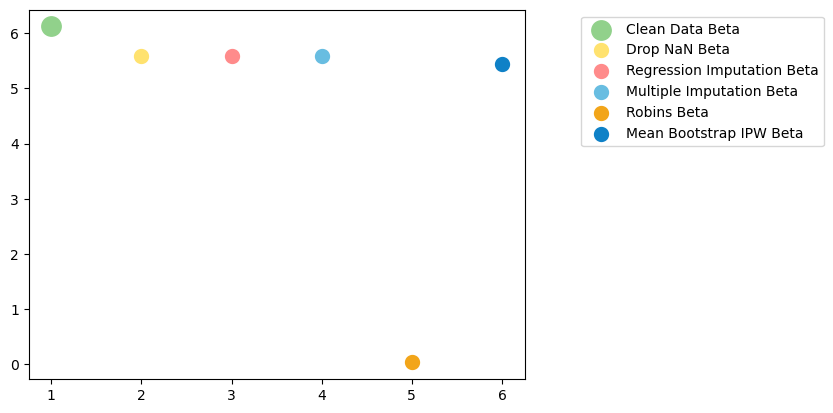

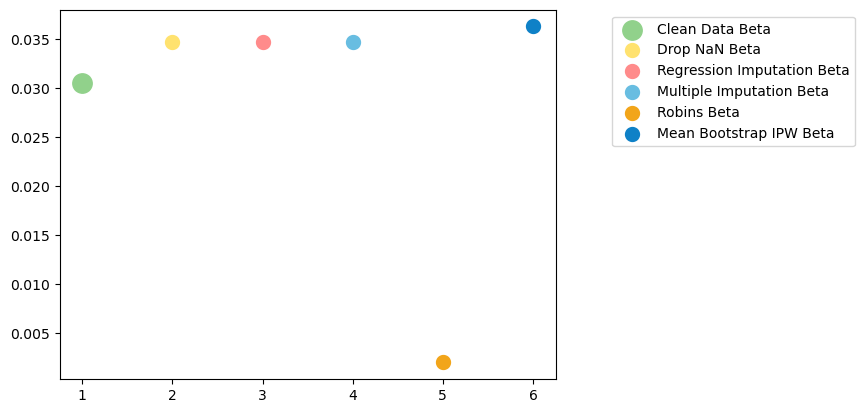

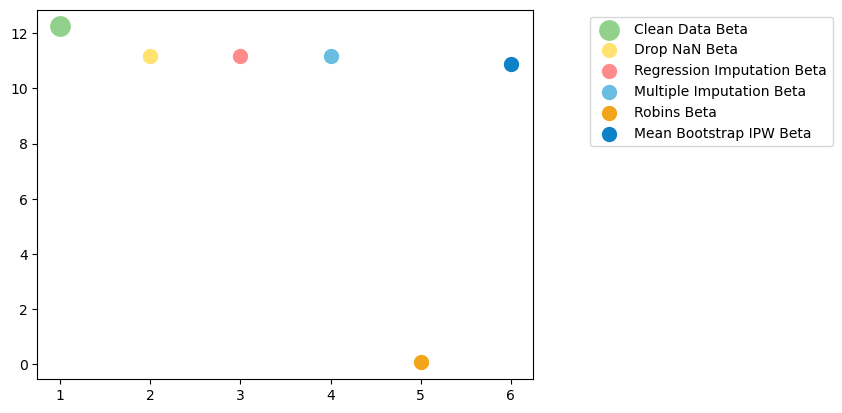

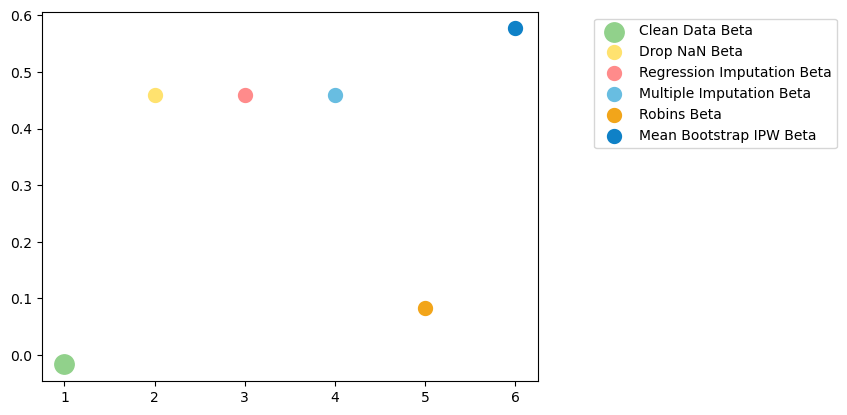

In [96]:
betas = [clean_beta_sample,drop_beta,imp_beta,mean_beta_impM,robins_beta,logR_beta,beta_IPW,mean_beta_BootstrapIPW]
for i in range(4): 
    plt.scatter([1],clean_beta_sample[i],label = 'Clean Data Beta',c = '#91D18B',linewidths=9)
    plt.scatter([2],drop_beta[i],label = 'Drop NaN Beta',c = '#FFE26F',linewidths=5)
    plt.scatter([3],imp_beta[i],label = 'Regression Imputation Beta',c = '#FF8B8B',linewidths=5)
    plt.scatter([4],mean_beta_impM[i],label = 'Multiple Imputation Beta',c = '#68BDE1',linewidths=5)
    plt.scatter([5],robins_beta[i],label = 'Robins Beta',c = '#F2A51A',linewidths=5)
    plt.scatter([6],mean_beta_BootstrapIPW[i],label = 'Mean Bootstrap IPW Beta',c = '#0F81C7',linewidths=5)
    plt.legend(loc='upper left',bbox_to_anchor= (1.1,1))
    plt.show()

### Confident Intervals

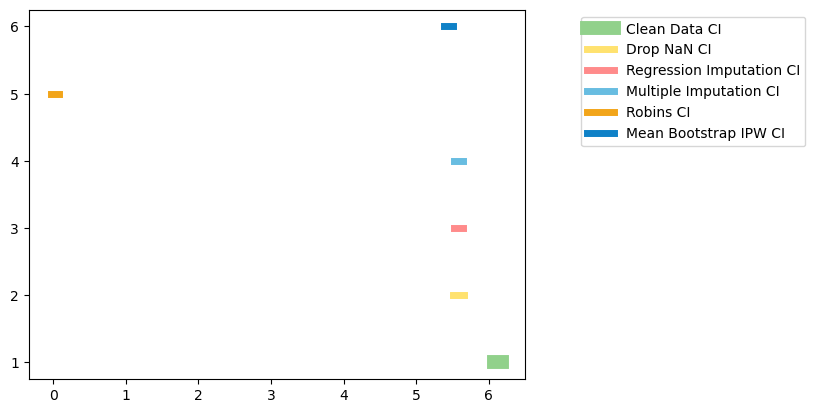

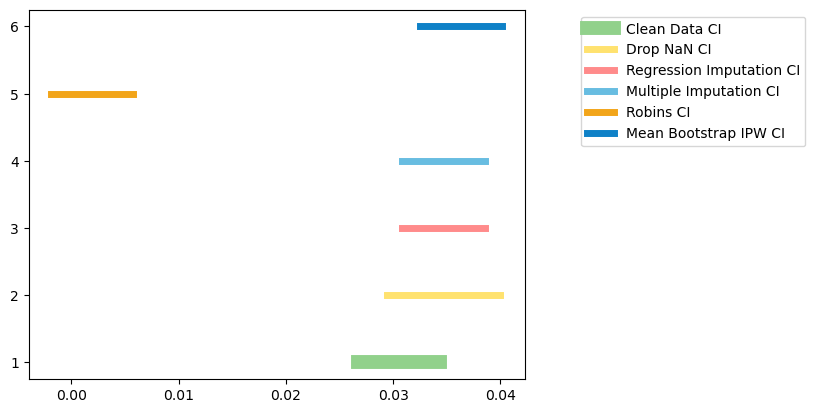

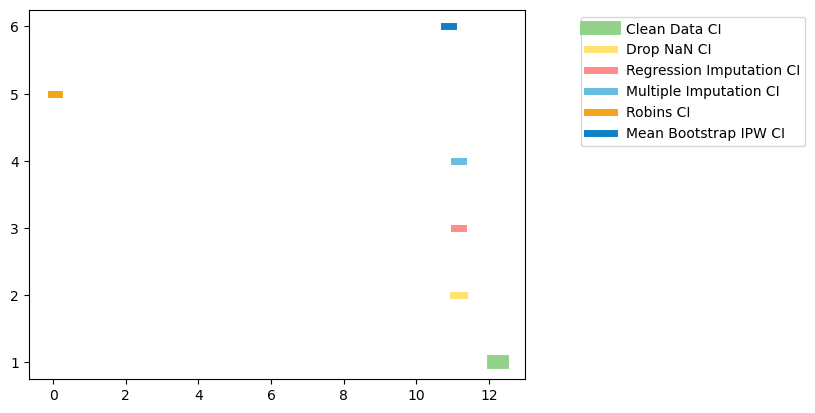

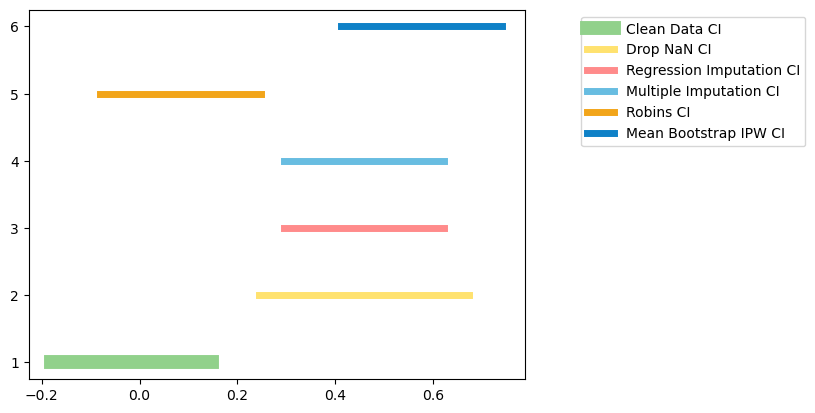

In [97]:
for i in range(4): 
    plt.plot(clean_CI[i],[1,1],label = 'Clean Data CI',c = '#91D18B',lw=10)
    plt.plot(drop_CI[i],[2,2],label = 'Drop NaN CI',c= '#FFE26F',lw=5)
    plt.plot(imp_CI[i],[3,3],label = 'Regression Imputation CI',c = '#FF8B8B',lw=5)
    plt.plot(impM_CI[i],[4,4],label = 'Multiple Imputation CI',c = '#68BDE1',lw=5)
    plt.plot(robins_CI[i],[5,5],label = 'Robins CI',c = '#F2A51A',lw=5)
    plt.plot(IPW_bootstrap_CI[i],[6,6],label = 'Mean Bootstrap IPW CI',c = '#0F81C7',lw=5)
    plt.legend(loc='upper left',bbox_to_anchor= (1.1,1))
    plt.show()

#### As we can observe, using Mean Bootstrap IPW and Robins are the closest to sampled clean whole data Beta estimator and CI.